### Visualising the data

#### What files are in the input folder:

In [1]:
# All imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import gc


In [2]:
import os 
print('No. of files: {}'.format(str(len(os.listdir("./input")))))
print(os.listdir("./input"))

No. of files: 3
['sample_submission.csv', 'test.csv', 'train.csv']


##### Train and Test files

In [41]:
#Loading Train and Test Data

df_train = pd.read_csv("./input/train.csv")
df_test = pd.read_csv("./input/test.csv")

print("{} observations and {} features in train set.".format(df_train.shape[0], df_train.shape[1]))
print("{} observations and {} features in test set.".format(df_test.shape[0], df_test.shape[1]))

200000 observations and 202 features in train set.
200000 observations and 201 features in test set.


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [8]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [10]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


Let's now look at the target score 

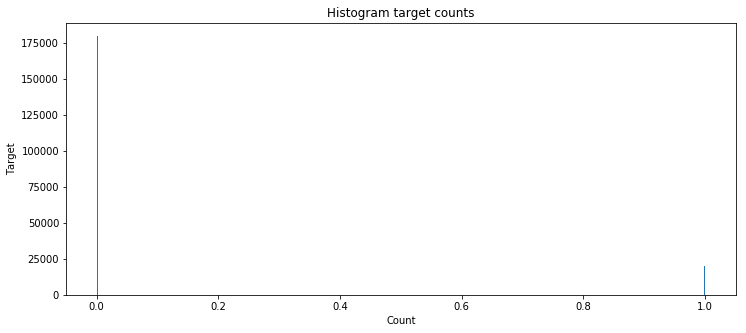

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.hist(df_train.target.values, bins=500)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

In [12]:
df_train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

Let's centre and normalise the data

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True, feature_range=(-1, 1))
x_transformed_train = scaler.fit_transform(df_train.iloc[:,2:])
x_transformed_test = scaler.transform(df_test.iloc[:,1:])

df_transformed_train = pd.DataFrame(data=x_transformed_train)
df_transformed_test = pd.DataFrame(data=x_transformed_test)


In [42]:
df_train_small = df_train.iloc[:5000,2:]
df_test_small = df_test.iloc[:5000,1:]

print(df_train_small.shape)
print(df_test_small.shape)


(5000, 200)
(5000, 200)


In [43]:
import time

def feature_creation(df, idx, name_num = '_1'):
    #data metrics
    print('  * Loading new data metrics: ', name_num)
    df['sum'+name_num] = df[idx].sum(axis=1)  
    df['min'+name_num] = df[idx].min(axis=1)
    df['max'+name_num] = df[idx].max(axis=1)
    df['mean'+name_num] = df[idx].mean(axis=1)
    df['std'+name_num] = df[idx].std(axis=1)
    df['skew'+name_num] = df[idx].skew(axis=1)
    df['kurt'+name_num] = df[idx].kurtosis(axis=1)
    df['med'+name_num] = df[idx].median(axis=1)
    #moving average
    print('  * Loading moving average metric: ', name_num)
    df['ma'+name_num] =  df[idx].apply(lambda x: np.ma.average(x), axis=1)
    #percentiles
    print('  * Loading percentiles: ', name_num)
    df['perc_1'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 1), axis=1)
    df['perc_5'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 5), axis=1)
    df['perc_25'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 25), axis=1)
    df['perc_50'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 50), axis=1)
    df['perc_75'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 75), axis=1)
    df['perc_95'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 95), axis=1)
    df['perc_99'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 99), axis=1)
    

start_time = time.time()

#for i,df in enumerate([df_train_small, df_test_small]):
print('Loading more features for train dataset')
print('Creating Metrics Part 1')
#features_1 = df_train_small.columns.values[2:202]
features_1 = df_train_small.columns
feature_creation(df_train_small, features_1, name_num='_1') #adding columns using the train features (#200)
print('Creating Metrics Part 2')
#features_2 = df_train_small.columns.values[2:218] #all features included the ones added
features_2 = df_train_small.columns #all features included the ones added
feature_creation(df_train_small, features_2, name_num='_2') #adding columns using the train features + the new features

print('-'*50)

print('Loading more features for test dataset')
print('Creating Metrics Part 1')
features_1 = df_test_small.columns
feature_creation(df_test_small, features_1, name_num='_1') #adding columns using the train features (#200)
print('Creating Metrics Part 2')
features_2 = df_test_small.columns #all features included the ones added
feature_creation(df_test_small, features_2, name_num='_2') #adding columns using the train features + the new features


print('Features loaded !')
print("Execution --- %s seconds ---" % (time.time() - start_time))
print('Train df: ', df_train_small.columns)
print('Test df: ', df_test_small.columns)
print('Number of Features: ', len(df_train_small.columns))
print('Number of Features: ', len(df_test_small.columns))


Loading more features for train dataset
Creating Metrics Part 1
  * Loading new data metrics:  _1
  * Loading moving average metric:  _1
  * Loading percentiles:  _1
Creating Metrics Part 2
  * Loading new data metrics:  _2
  * Loading moving average metric:  _2
  * Loading percentiles:  _2
--------------------------------------------------
Loading more features for test dataset
Creating Metrics Part 1
  * Loading new data metrics:  _1
  * Loading moving average metric:  _1
  * Loading percentiles:  _1
Creating Metrics Part 2
  * Loading new data metrics:  _2
  * Loading moving average metric:  _2
  * Loading percentiles:  _2
Features loaded !
Execution --- 33.45758032798767 seconds ---
Train df:  Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'kurt_2', 'med_2', 'ma_2', 'perc_1_2', 'perc_5_2', 'perc_25_2',
       'perc_50_2', 'perc_75_2', 'perc_95_2', 'perc_99_2'],
      dtype='object', length=232)
Test df:  Ind

In [45]:
df_train_small.drop(['min_2','max_2'],axis=1,inplace=True)
df_test_small.drop(['min_2','max_2'],axis=1,inplace=True)

print(df_train_small.shape)
print(df_test_small.shape)

(5000, 230)
(5000, 230)


Let's split the data in train and test data

In [48]:
from sklearn.model_selection import train_test_split

x = df_train_small
y = df_train['target'][:5000]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 13, test_size = 0.2)

pd.DataFrame(data=x_train).head(3)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,kurt_2,med_2,ma_2,perc_1_2,perc_5_2,perc_25_2,perc_50_2,perc_75_2,perc_95_2,perc_99_2
2729,13.4829,-2.3449,8.8573,9.0543,11.5035,-18.6207,5.6302,20.0854,1.6109,6.7838,...,211.844078,6.826325,14.004250,-17.371325,-8.960975,1.390275,6.826325,12.948225,25.536375,34.818080
3923,8.8224,-10.0485,12.7912,2.6548,12.5755,-8.4661,5.7408,21.1540,-1.9907,5.6307,...,210.527171,5.754825,12.860593,-27.423560,-7.296450,0.742350,5.754825,13.100706,22.322550,34.033170
320,18.7685,-7.3518,14.3081,7.0872,9.8062,-9.6050,5.7641,13.2822,2.8915,7.3591,...,210.934772,7.081825,14.312920,-26.469462,-9.855400,2.446850,7.081825,12.566100,26.710575,38.120495


#### GNB

In [49]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

In [50]:
GNB.fit(x_train, y_train)
y_preds_test = GNB.predict_proba(x_test)
print(y_preds_test[:10])

[[9.36234774e-01 6.37652261e-02]
 [9.89847818e-01 1.01521817e-02]
 [9.96609332e-01 3.39066795e-03]
 [9.97655892e-01 2.34410831e-03]
 [9.99523643e-01 4.76356988e-04]
 [7.48078476e-01 2.51921524e-01]
 [9.80769004e-01 1.92309959e-02]
 [9.99757434e-01 2.42565769e-04]
 [9.67856200e-01 3.21438005e-02]
 [9.84074483e-01 1.59255174e-02]]


In [51]:
from sklearn.metrics import roc_auc_score 

probs_pos_test_gnb  = []
for pred in y_preds_test:
    probs_pos_test_gnb.append(pred[1])
    
roc_test = roc_auc_score(y_test, probs_pos_test_gnb)
print(roc_test)

0.8215113424895252


#### LGB

In [52]:
from lightgbm import LGBMRegressor, LGBMClassifier

# learning_rate': 0.008, n_estimators = 2000, commented out settings 1. --> 0.8836
# learning_rate': 0.05, n_estimators = 2000, commented out settings 2. --> 0.8867
# learning_rate': 0.07, n_estimators = 6000, commented out settings 2. --> 0.8649
# learning_rate': 0.03, n_estimators = 2000, commented out settings 3. --> 0.8768
# learning_rate': 0.03, n_estimators = 2000, commented out settings 4. --> 0.8851
# learning_rate': 0.03, n_estimators = 2000, commented out settings 4. with gamma dist --> 0.8019
# learning_rate': 0.03, n_estimators = 2000, commented out settings 5. with binary dist --> 0.8929
# learning_rate': 0.03, n_estimators = 2000, commented out settings 5. with binary dist + classifier model --> 0.8930
# learning_rate': 0.05, n_estimators = 2000, commented out settings 6. with binary dist + classifier model --> 0.8585
# learning_rate': 0.02, n_estimators = 4000, commented out settings 7. with binary dist + classifier model --> 0.8950


# 7
LGB_params = {'num_leaves': 255,
         'objective': 'binary',
         'learning_rate': 0.02,
         'metric': 'rmse',
         'max_bin': 120,
         'num_iterations': 4000,
         'boosting': 'gbdt'}

#6
#LGB_params = {'num_leaves': 255,
#         'min_data_in_leaf': 0,
#         'objective': 'regression',
#         'max_depth': 13,
#         'learning_rate': 0.05,
#         "boosting": "gbdt",
#         "feature_fraction": 0.8,
#         "bagging_freq": 7,
#         "bagging_fraction": 0.8,
#         "bagging_seed": 11,
#         "metric": 'rmse',
#         "lambda_l1": 0.1,
#         "verbosity": -1,
#         'min_child_weight': 5,
#         'reg_alpha': 1.15,
#         'reg_lambda': 0.25,
#         'subsample': 0.80,
#         'max_bin': 120}

# 5
#LGB_params = {'num_leaves': 255,
#         'objective': 'binary',
#         'learning_rate': 0.03,
#         'metric': 'rmse',
#         'max_bin': 120,
#         'num_iterations': 2000,
#         'boosting': 'gbdt'}

# 4
#LGB_params = {'num_leaves': 60,
#         'objective': 'regression',
#         'learning_rate': 0.03,
#         'metric': 'rmse',
#         'max_bin': 120,
#         'num_iterations': 2000,
#         'boosting': 'gbdt'}

# 3
#LGB_params = {'num_leaves': 60,
#         'objective': 'regression',
#         'learning_rate': 0.03,
#         'metric': 'rmse',
#         'max_bin': 120,
#         'num_iterations': 2000,
#         'boosting': 'dart'}

# 2
#LGB_params = {'num_leaves': 40,
#         'min_data_in_leaf': 50,
#         'objective': 'regression',
#         'max_depth': 9,
#         'learning_rate': 0.07,
#         "boosting": "gbdt",
#         "feature_fraction": 0.7,
#         "bagging_freq": 7,
#         "bagging_fraction": 0.7,
#         "bagging_seed": 11,
#         "metric": 'rmse',
#         "lambda_l1": 0.1,
#         "verbosity": -1,
#         'min_child_weight': 5,
#         'reg_alpha': 1.15,
#         'reg_lambda': 0.25,
#         'subsample': 0.80,}

# 1. LGB_params = {'num_leaves': 50,
#         'min_data_in_leaf': 70,
#         'objective': 'regression',
#         'max_depth': 13,
#         'learning_rate': 0.008,
#         "boosting": "gbdt",
#         "feature_fraction": 0.8,
#         "bagging_freq": 7,
#         "bagging_fraction": 0.8,
#         "bagging_seed": 11,
#         "metric": 'rmse',
#         "lambda_l1": 0.1,
#         "verbosity": -1,
#         'min_child_weight': 5,
#         'reg_alpha': 1.15,
#         'reg_lambda': 0.25,
#         'subsample': 0.80,}

#LGB = LGBMRegressor(**LGB_params, n_estimators = 2000, nthread = 4, n_jobs = -1)

LGB = LGBMClassifier(**LGB_params, n_estimators = 2000, nthread = 4, n_jobs = -1)

In [53]:
LGB.fit(x_train, y_train, eval_metric='rmse', verbose=1000)


E:\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LGBMClassifier(boosting='gbdt', boosting_type='gbdt', class_weight=None,
        colsample_bytree=1.0, importance_type='split', learning_rate=0.02,
        max_bin=120, max_depth=-1, metric='rmse', min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=2000,
        n_jobs=-1, nthread=4, num_iterations=4000, num_leaves=255,
        objective='binary', random_state=None, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [54]:
y_pred = LGB.predict_proba(x_test) # for classifier
#y_pred = LGB.predict(x_test) # for regression
print(y_pred[:10])
#print(min(y_pred))
#print(max(y_pred))



[[9.99975128e-01 2.48724166e-05]
 [9.99882493e-01 1.17507147e-04]
 [9.99998535e-01 1.46511896e-06]
 [9.99997042e-01 2.95754297e-06]
 [9.99999910e-01 8.96699629e-08]
 [9.99999026e-01 9.74082702e-07]
 [9.99998667e-01 1.33335200e-06]
 [9.99999945e-01 5.51616288e-08]
 [9.99991069e-01 8.93077808e-06]
 [9.99999180e-01 8.19861287e-07]]


In [55]:
#print(y_pred[:, 1:])
roc_test = roc_auc_score(y_test, y_pred[:, 1:].clip(0, 1))
print(roc_test)
# got 0.8846161338721976 with LGBMClassifier and LGB.predict_proba(x_test)

0.8010297861652453
